<b> A complete guide: https://scikit-learn.org/stable/modules/clustering.html </b>

In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [64]:
df = pd.read_csv("seismic-bumps.csv")

In [65]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# Applying log transform

df['log_genergy'] = np.log(df['genergy'])
df['log_gpuls'] = np.log(df['gpuls'])

In [67]:
# dropping the row containing the outlier

df.drop(index=[1691], inplace=True)

In [68]:
cols = df.select_dtypes([np.number]).columns
cols = np.delete(cols, np.where(cols == 'class'))
num_values = df[cols].values

scaler = RobustScaler()
values_scal = scaler.fit_transform(num_values)

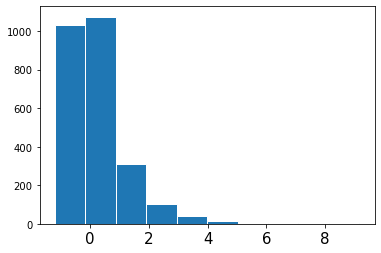

In [69]:
plt.hist(values_scal[:,2], edgecolor='white')

plt.xticks(fontsize=15)
plt.show()

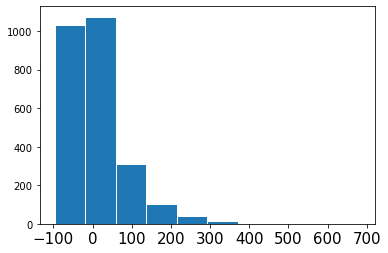

In [70]:
plt.hist(num_values[:,2], edgecolor='white')

plt.xticks(fontsize=15)
plt.show()

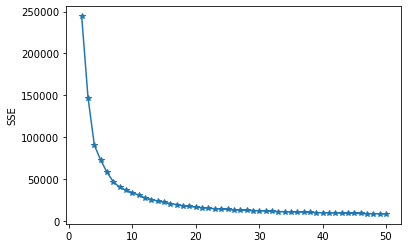

In [71]:
# calculating the Sum of Squared Error (SSE) for K in range(2, 52)

sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(values_scal)
    sse_list.append( kmeans.inertia_ )
    
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [72]:
# Applying k-means on numerical attributes of the dataset

kmeans = KMeans( n_clusters=5, n_init=20, max_iter=100 )
kmeans.fit(values_scal)

KMeans(max_iter=100, n_clusters=5, n_init=20)

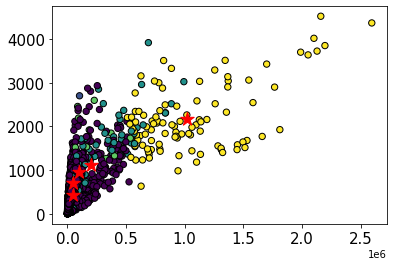

In [73]:
# Plotting the clusters whith their centroids for the attributes 'genergy' and 'gpuls'

plt.scatter( num_values[:,0], num_values[:,1], s=40, edgecolor='black', c= kmeans.labels_ )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,0], centers[:,1], c='red', marker='*', s=200 )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

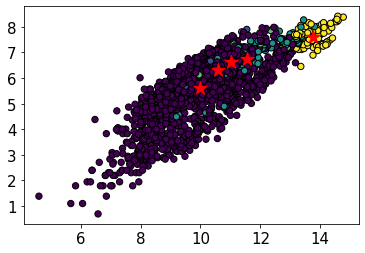

In [74]:
# Plotting the clusters whith their centroids for the attributes 'log_genergy' and 'log_gpuls'

plt.scatter( num_values[:,14], num_values[:,15], s=40, edgecolor='black', c= kmeans.labels_ )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,14], centers[:,15], c='red', marker='*', s=200 )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

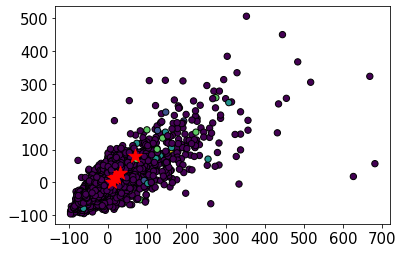

In [76]:
# Plotting the clusters whith their centroids for the attributes 'gdenergy' and 'gdpuls'

plt.scatter( num_values[:,2], num_values[:,3], s=40, edgecolor='black', c= kmeans.labels_ )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,2], centers[:,3], c='red', marker='*', s=200 )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

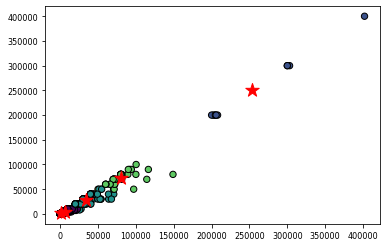

In [77]:
# Plotting the clusters whith their centroids for the attributes 'energy' and 'maxenergy'

plt.scatter( num_values[:,12], num_values[:,13], s=40, edgecolor='black', c= kmeans.labels_ )

centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter( centers[:,12], centers[:,13], c='red', marker='*', s=200 )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

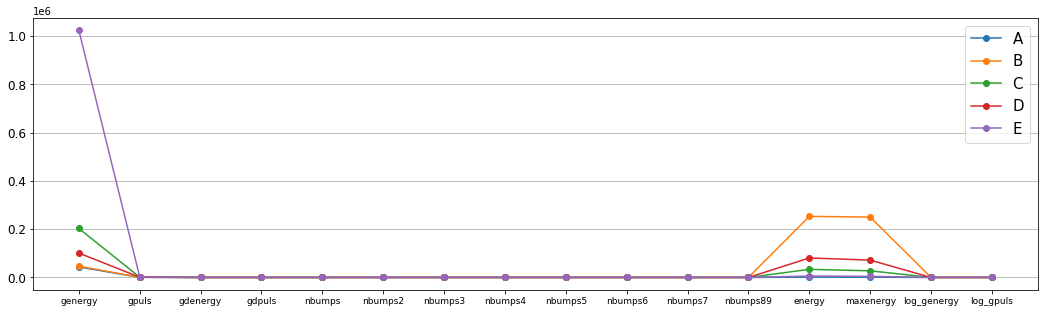

In [79]:
plt.figure(figsize=(18, 5))

clust_name = ['A', 'B', 'C', 'D', 'E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=9)
plt.yticks(fontsize=12)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')

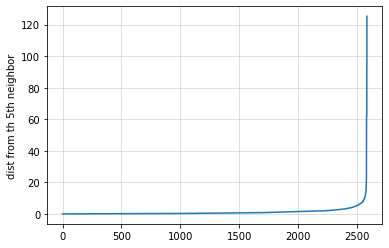

In [48]:
# Determing eps and minPts with the elbow method (see slide Clustering: Density-based-methods page 20 for info)

dist = pdist(values_scal, 'euclidean')
dist = squareform(dist)

k=5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')

plt.grid(alpha=0.5)
plt.show()

In [39]:
# Applying DBSCAN on on numerical attributes of the dataset with eps = 80 and min_sample = 5

dbscan = DBSCAN( eps=80, min_samples=5)
dbscan.fit(values_scal)

DBSCAN(eps=80)

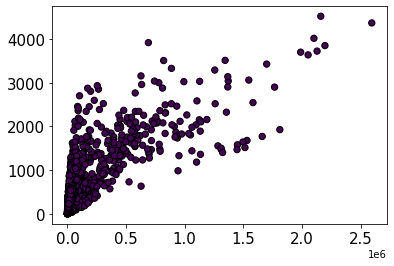

In [44]:
# Plotting the clusters for the attributes 'genergy' and 'gpuls'

plt.scatter( num_values[:,0], num_values[:,1], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

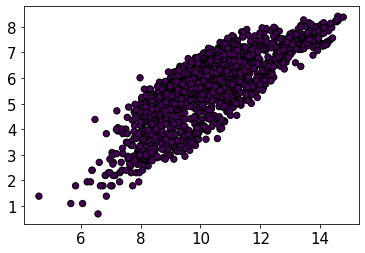

In [45]:
# Plotting the clusters for the attributes 'log_genergy' and 'log_gpuls'

plt.scatter( num_values[:,14], num_values[:,15], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

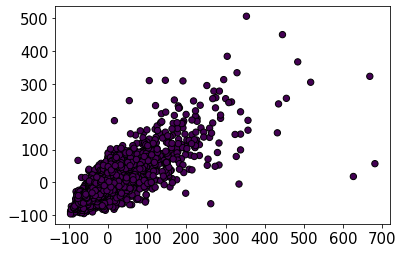

In [46]:
# Plotting the clusters for the attributes 'gdenergy' and 'gdpuls'

plt.scatter( num_values[:,2], num_values[:,3], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

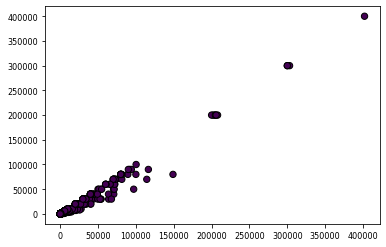

In [49]:
# Plotting the clusters for the attributes 'energy' and 'maxenergy'

plt.scatter( num_values[:,12], num_values[:,13], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()